In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

##  Excercise 8

In [8]:
X, y = make_moons(n_samples = 1000, noise = 0.4)

In [3]:
X.shape

(1000, 2)

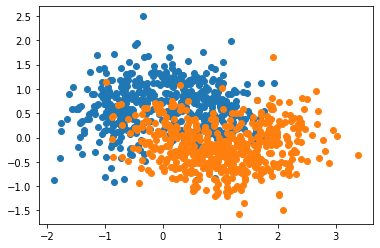

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
params = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[40,50,60, None],
    'min_samples_split':[1,2,3,5,6,7],
    'min_samples_leaf':[1,2,3,4,5],
    'min_weight_fraction_leaf':[0.0, 0.01, 0.03, 0.05],
    'max_leaf_nodes':[None, 75,85,100,115,130,200, 250, 300],
    'min_impurity_decrease':[0.0, 0.001, 0.005]
}

cv = GridSearchCV(DecisionTreeClassifier(), params, scoring='accuracy', n_jobs=4) 

In [17]:
cv.fit(X_train, y_train)

c:\users\marko\development\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [    nan     nan     nan ... 0.76125 0.825   0.75875]
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 60, None],
                         'max_leaf_nodes': [None, 75, 85, 100, 115, 130, 200,
                                            250, 300],
                         'min_impurity_decrease': [0.0, 0.001, 0.005],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 5, 6, 7],
                         'min_weight_fraction_leaf': [0.0, 0.01, 0.03, 0.05],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:
cv.best_score_

0.85375

In [20]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_leaf_nodes': 115,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'random'}

In [22]:
bestEstimator = cv.best_estimator_

bestEstimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=60, max_leaf_nodes=115,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       min_samples_split=3, splitter='random')

In [23]:
bestEstimator.score(X_test, y_test)

0.86

## Excercise 9

In [97]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, test_size=0.1)

In [98]:
from sklearn.base import clone 
estimators = [clone(cv.best_estimator_) for i in range(0,1000)]

for  (train_index, test_index), estimator in zip(rs.split(X_train), estimators):
    estimator.fit(X_train[train_index], y_train[train_index])

In [99]:
from scipy.stats import mode

predictions = np.repeat(0, len(y_test))

for i in range(0, len(y_test)):
    pred = np.repeat(0, 1000)
    for j in range(0,1000):
        pred[j] = estimators[j].predict(X_test[i].reshape(1, -1))
    predictions[i] = mode(pred)[0][0]


In [100]:
sum(predictions == y_test)/len(y_test)

0.86